## Capstone Project - The Battle of Neighborhoods in Toronto

![title](img/torontoskyline.png)


### This assignment is part one of the final capstone data science project. The problem statement that I am trying to solve is formulated below and also the data and sources of data that will be used are detailed in this assignment.

### Introduction/Business Problem

Mark already owns a courier business, delivering documents and large parcels to homes in the boroughs of Toronto. Recently he has observed a rise in people preferring to buy organic food and fresh farm produce because more and more people are adopting conscious health lifestyle. He is now thinking of expanding his income stream by offering a service to people or restaurants that would like organic and fresh farm produce delivered directly to their door step. In so doing, Mark eliminates the time consuming necessity of people going to the market every day. He has talked to some farmers and they have agreed to sell their products at a discount price, provided that he is able to move a large volume of goods to market quickly. His potential clients are office workers, restaurants or individuals with a taste for organic food. Having saved some money, from his other business he is now looking for a borough/neighbourhood where he can build/rent a warehouse. The criteria for this borough/neighbourhood should be:
1.	The population of people must be large enough so that he has a ready supply of customers.
2. Average income of people must be high enough to be able to buy this type of food.
2.	A reasonable number of restaurants that can potentially be his customers, e.g., more family themed restaurants instead of fast food outlets.
4.	Rent or buying the warehouse should be in an ideal location that is not costly. 


### Data Section

1.	Geospatial information about the borough and the neighborhoods in that borough will be needed. This will gives the exact locations of the neighborhoods within Toronto using latitude and longitude values. This information can be obtained by web scrapping data from the following Wikipedia pages:
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'


2.	We will need data about different venues in different neighborhoods of each borough. I will be using Foursquare’s ‘Places API’ to acquire data related to ‘venues’ (as defined by Foursquare) categorized to be somehow associated with food. Foursquare defines a ‘venue’ as a place that one can go to, or check-in to. A venue can be any establishment such as a restaurant or type of retail shop. Each Foursquare ‘venue’ is assigned a ‘category’ and each ‘category’ is associated with a particular ‘categoryID’. The request below shows the ‘categoryID’ values provided by Foursquare that will be used to acquire food related venues within Toronto:


3.	Data about the demographics of each borough is also needed. This data can be scraped from the following Wikipedia page:
https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods as shown below:


### Part 1
#### First part of this analysis is looking at the demographics of the Toronto boroughs. For this part, we are particularly interested in the population density and median income of each borough. The answers we obtain from here will be applicable to point 1 and 2, in the Introduction/Business problem section. 

This data can be scraped from the following Wikipedia page: https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods as shown below:

In [1]:
#import libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup

#Create a handle, wiki_url, to handle the contents of the website

dg_url = requests.get('https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods').text
soup = BeautifulSoup(dg_url, 'html.parser') #create BeautifulSoup object called soup and specify html parser
print(soup.prettify()) #use this output to check where the data needed is located in the html source

dgtoronto_rawdata = soup.find('table', class_='wikitable')

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Demographics of Toronto neighbourhoods - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Demographics_of_Toronto_neighbourhoods","wgTitle":"Demographics of Toronto neighbourhoods","wgCurRevisionId":810941245,"wgRevisionId":810941245,"wgArticleId":38958143,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with obsolete information from April 2013","All Wikipedia articles in need of updating","Neighbourhoods in Toronto"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames

In [2]:
# we create a list of lists to store data from the wiki table

# data rows for the table are indicated by '<\tr>' tags 

dg_list = [] # initialize list of lists

for dgrow in dgtoronto_rawdata.find_all('tr'):
    dgrow_data = dgrow.text.split('\n')[1:-1]
    dg_list.append(dgrow_data)

print(dg_list)

[['Name', '', 'FM', '', 'Census Tracts', '', 'Population', '', 'Land area (km2)', '', 'Density (people/km2)', '', '% Change in Population since 2001', '', 'Average Income', '', 'Transit Commuting\xa0%', '', '% Renters', '', 'Second most common language (after English) by name', '', 'Second most common language (after English) by percentage', '', 'Map'], ['Toronto CMA Average', '', '', '', 'All', '', '5,113,149', '', '5903.63', '', '866', '', '9.0', '', '40,704', '', '10.6', '', '11.4', '', '', '', '', '', ''], ['Agincourt', '', 'S', '', '0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0378.08, 0378.14, 0378.23, 0378.24', '', '44,577', '', '12.45', '', '3580', '', '4.6', '', '25,750', '', '11.1', '', '5.9', '', 'Cantonese (19.3%)', '', '19.3% Cantonese', '', ''], ['Alderwood', '', 'E', '', '0211.00, 0212.00', '', '11,656', '', '4.94', '', '2360', '', '-4.0', '', '35,239', '', '8.8', '', '8.5', '', 'Polish (6.2%)', '', '06.2% Polish', '', ''], ['Alexandra Park', '', 'OCoT', '', '0039.00', '

The code below will change the styling of all the tables, from the default jupyter notebook table formatting. let's be fancy. Why not??

In [3]:
%%HTML    
<style type="text/css">
table > thead > tr > th {
background-color: #777;
color: white;
}
table.dataframe td, table.dataframe th {
border-style: solid;
border: 1px solid lightgray;
}
</style>

In [4]:
dg_neighborhoods = pd.DataFrame(dg_list[1:], columns=dg_list[0]) # create the data frame from lists of lists using pandas
dg_neighborhoods.head() # view the first 5 rows

,Name,,FM,,Census Tracts,,Population,,Land area (km2),,...,,Transit Commuting %,,% Renters,,Second most common language (after English) by name,,Second most common language (after English) by percentage,,Map
0,Toronto CMA Average,,,,All,,"5,113,149",,5903.63,,...,,10.6,,11.4,,,,,,
1,Agincourt,,S,,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",,"44,577",,12.45,,...,,11.1,,5.9,,Cantonese (19.3%),,19.3% Cantonese,,
2,Alderwood,,E,,"0211.00, 0212.00",,"11,656",,4.94,,...,,8.8,,8.5,,Polish (6.2%),,06.2% Polish,,
3,Alexandra Park,,OCoT,,0039.00,,"4,355",,0.32,,...,,13.8,,28.0,,Cantonese (17.9%),,17.9% Cantonese,,
4,Allenby,,OCoT,,0140.00,,"2,513",,0.58,,...,,5.2,,3.4,,Russian (1.4%),,01.4% Russian,,


#### As we can see some of the columns in the table are not needed. They need to be removed.

In [5]:
## list(dg_neighborhoods) Or
dg_neighborhoods.columns.values.tolist() # list columns names retrieved from the table

['Name',
 '',
 'FM',
 '',
 'Census Tracts',
 '',
 'Population',
 '',
 'Land area (km2)',
 '',
 'Density (people/km2)',
 '',
 '% Change in Population since 2001',
 '',
 'Average Income',
 '',
 'Transit Commuting\xa0%',
 '',
 '% Renters',
 '',
 'Second most common language (after English) by name',
 '',
 'Second most common language (after English) by percentage',
 '',
 'Map']

#### We need the the Name, FM (Former Municipality aka Borough), Population, Land Area, Dennsity and Average Income columns, the rest we can drop. The resulting data frame is shown below:

In [6]:
#dg_neighborhoods.drop(["Census Tracts", "% Change in Population since 2001", "Transit Commuting\xa0%",
                      #"% Renters", "Second most common language (after English) by name", 
                       #"Second most common language (after English) by percentage", "Map"], axis = 1, inplace = True) 

#you want to change to inplace=True to affect the underlying data

columns_new = ['Name', 'FM', 'Population', 'Land area (km2)', 'Density (people/km2)', 'Average Income']
new_df = dg_neighborhoods.loc[:, columns_new] #creating a new data frame with the columns we want


In [7]:
new_df = new_df.drop(0, axis=0) # drop the first row, the Toronto average
new_df.reset_index(drop = True, inplace = True)

# inplace=True to affect DataFrame
new_df.rename(columns = {'Name': 'Neighborhood', 'FM': 'Borough', 'Land area (km2)': 'Land_Area', 'Density (people/km2)': 'Density',
                         'Average Income': 'Average_Income'}, inplace=True) # change FM to Borough


new_df.head()

,Neighborhood,Borough,Population,Land_Area,Density,Average_Income
0,Agincourt,S,"44,577",12.45,3580,"25,750"
1,Alderwood,E,"11,656",4.94,2360,"35,239"
2,Alexandra Park,OCoT,"4,355",0.32,"13,609","19,687"
3,Allenby,OCoT,"2,513",0.58,4333,"245,592"
4,Amesbury,NY,"17,318",3.51,"4,934","27,546"


In [8]:
new_df.shape #there are 174 neighborhoods in the data set

(174, 6)

In [9]:
## new_df.to_csv('dg_neighborhoods.csv', index=False) # can save the file to a csv file'.
# the data frame has 174 rows. can easily display all the rows to check if all the data is ok.

pd.set_option('display.max_rows', None)
new_df


,Neighborhood,Borough,Population,Land_Area,Density,Average_Income
0,Agincourt,S,"44,577",12.45,3580,"25,750"
1,Alderwood,E,"11,656",4.94,2360,"35,239"
2,Alexandra Park,OCoT,"4,355",0.32,"13,609","19,687"
3,Allenby,OCoT,"2,513",0.58,4333,"245,592"
4,Amesbury,NY,"17,318",3.51,"4,934","27,546"
5,Armour Heights,NY,"4,384",2.29,1914,"116,651"
6,Banbury,NY,"6,641",2.72,2442,"92,319"
7,Bathurst Manor,NY,"14,945",4.69,3187,"34,169"
8,Bay Street Corridor,OCoT,"4,787",0.11,"43,518","40,598"
9,Bayview Village,NY,"12,280",4.14,"2,966","46,752"


In [10]:
# After reviewing the data frame, we see that row 63 has some text combined with numbers. we need to remove the text.
new_df.at[63,'Average_Income']

'45,792Canada 2011 Census[1]'

In [11]:
new_df.at[63,'Average_Income']= '45,792' # simply reassign 
pd.set_option('display.max_rows', None)
new_df  # the data frame looks ok now

,Neighborhood,Borough,Population,Land_Area,Density,Average_Income
0,Agincourt,S,"44,577",12.45,3580,"25,750"
1,Alderwood,E,"11,656",4.94,2360,"35,239"
2,Alexandra Park,OCoT,"4,355",0.32,"13,609","19,687"
3,Allenby,OCoT,"2,513",0.58,4333,"245,592"
4,Amesbury,NY,"17,318",3.51,"4,934","27,546"
5,Armour Heights,NY,"4,384",2.29,1914,"116,651"
6,Banbury,NY,"6,641",2.72,2442,"92,319"
7,Bathurst Manor,NY,"14,945",4.69,3187,"34,169"
8,Bay Street Corridor,OCoT,"4,787",0.11,"43,518","40,598"
9,Bayview Village,NY,"12,280",4.14,"2,966","46,752"


In [12]:
new_df.dtypes  # check the data types of the columns

Neighborhood      object
Borough           object
Population        object
Land_Area         object
Density           object
Average_Income    object
dtype: object

In [13]:
# we need to change Land area(km2) to a float, and Population, Density and Average_Income to intergers
new_df['Land_Area'] = new_df.Land_Area.astype(float)
new_df['Population'] = new_df.Population.str.replace(',', '').astype(int)
new_df['Density'] = new_df.Density.str.replace(',', '').astype(int)
new_df['Average_Income'] = new_df.Average_Income.str.replace(',', '').astype(int)


In [14]:
new_df.dtypes #all the data types should now be ok

Neighborhood       object
Borough            object
Population          int32
Land_Area         float64
Density             int32
Average_Income      int32
dtype: object

#### Before we do analysis, let's replace the abbreviations for the boroughs, with the full names

In [15]:
# Old City of Toronto (OCoT), Scarborough (S), North York (NY), Etobicoke (E), York (Y), East York (EY)

new_df.Borough = new_df.Borough.replace({'OCoT': 'Old City of Toronto', 'S': 'Scarborough', 'NY': 'North York', 'E': 'Etobicoke',
                                     'Y': 'York', 'EY': 'East York'})

In [16]:
new_df.head(20)

,Neighborhood,Borough,Population,Land_Area,Density,Average_Income
0,Agincourt,Scarborough,44577,12.45,3580,25750
1,Alderwood,Etobicoke,11656,4.94,2360,35239
2,Alexandra Park,Old City of Toronto,4355,0.32,13609,19687
3,Allenby,Old City of Toronto,2513,0.58,4333,245592
4,Amesbury,North York,17318,3.51,4934,27546
5,Armour Heights,North York,4384,2.29,1914,116651
6,Banbury,North York,6641,2.72,2442,92319
7,Bathurst Manor,North York,14945,4.69,3187,34169
8,Bay Street Corridor,Old City of Toronto,4787,0.11,43518,40598
9,Bayview Village,North York,12280,4.14,2966,46752


### Let's do some EXPLORATORY DATA ANALYSIS

In [17]:
# allow plots to appear in notebook using matplotlib
%matplotlib inline

### List boroughs by population

In [18]:
data1 = new_df.groupby('Borough').Population.sum() # list boroughs by population
data1

Borough
East York              112054
Etobicoke              313772
North York             621068
Old City of Toronto    624910
Scarborough            600715
York                   143255
Name: Population, dtype: int32

#### From the above table we can see that the Old City of Toronto has the largest population. Just a few thousand more than North York.

### A bar graph of the population data for all boroughs

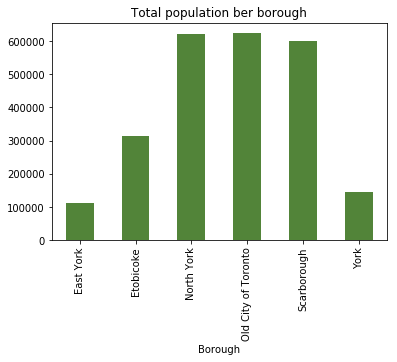

In [19]:
data1.plot(kind='bar', title='Total population ber borough', color='#528439') # a bar graph of the population data for all boroughs

### Look at the population density per borough

In [20]:
data4 = new_df.groupby('Borough').Density.mean() # list boroughs by population
data4

Borough
East York              7072.833333
Etobicoke              3334.720000
North York             4674.400000
Old City of Toronto    9370.281250
Scarborough            3970.655172
York                   5600.100000
Name: Density, dtype: float64

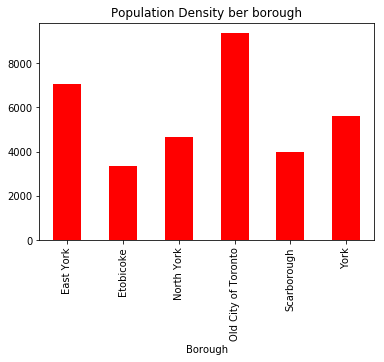

In [21]:
data4.plot(kind='bar', title='Population Density ber borough', color='red')

#### Even though the Old City of Toronto and North York may have roughly the same population, the population densities are very different. North York has half the density of the Old City of Toronto.

### Average income for each borough

In [22]:
# let's find average income for each borough
data2 = new_df.groupby('Borough').Average_Income.mean()
data2

Borough
East York              54604.000000
Etobicoke              43056.200000
North York             54389.925000
Old City of Toronto    58409.281250
Scarborough            30518.793103
York                   38124.000000
Name: Average_Income, dtype: float64

###  A bar graph of the average income per borough

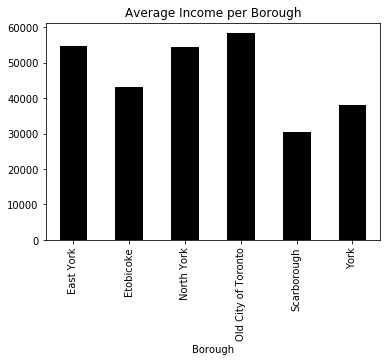

In [23]:
data2.plot(kind='bar', title='Average Income per Borough', color='black') #bar grapgh of the average income per borough

#### The Old City of Toronto has the highest average income of the boroughs.

### Which borough has the most neighborhoods?

In [24]:
#new_df['Borough'].value_counts()
data3 = new_df.groupby('Borough')['Neighborhood'].count()
data3

Borough
East York               6
Etobicoke              25
North York             40
Old City of Toronto    64
Scarborough            29
York                   10
Name: Neighborhood, dtype: int64

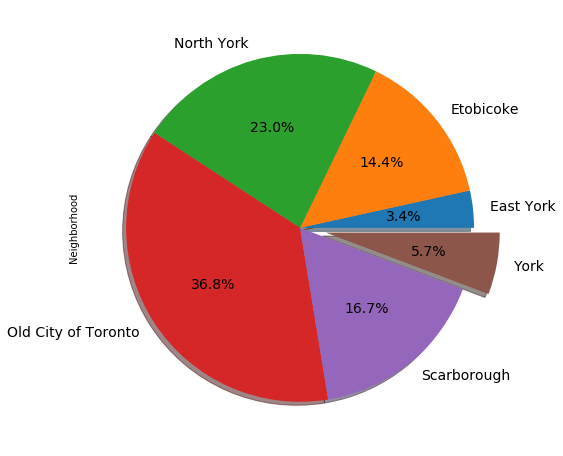

In [25]:
data3.plot(kind='pie', shadow=True, figsize=(16,8),fontsize=14, autopct='%1.1f%%', explode=(0, 0, 0, 0, 0, 0.15))

#### The Old City of Toronto has the most number of neighborhoods, as seen from the pie chart above.

### <font color=green> From the preliminary data exploration, it is clear that Old City of Toronto borough is the clear choice for Mark to look for a ware house for his delivery business. It has the highest population density and average income. Therefore in our clustering we will focus on the Old City of Toronto neighborhoods.</font> <br>

### Part 2

#### This part of the note book will try to answer points 3 and 4 of Mark's criteria in the Introduction/Business Problem. This will involve segmenting and clustering the neighborhoods.

a. The Toronto neighborhood data exists in a wikipedia page titled **'List of postal codes of Canada'**. To acquire the data I had to scrape and clean the data from the given wiki table to a pandas data frame, 

b. Obtain the geographical coordinates of each neighborhood (equivalent latitude and longitude values) using the geolocator library, geopy or as in this I used a readily available csv file. And then add the geographical coordinates to the table obtained in the first step,

c. At this point, the data set is now ready for exploration, segmenting and clustering.

In [26]:
#import libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup

#Create a handle, wiki_url, to handle the contents of the website

wiki_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(wiki_url, 'html.parser') #create BeautifulSoup object called soup and specify html parser
print(soup.prettify()) #use this output to check where the data needed is located in the html source

toronto_rawdata = soup.find('table', class_='wikitable')

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":900271985,"wgRevisionId":900271985,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communications in Ontario","Postal codes in Canada","Toronto","Ontario-related lists"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June",

In [27]:
# we create a list of lists to store data from the wiki table

# data rows for the table are indicated by '<\tr>' tags 

wiki_list = [] # initialize list of lists

for row in toronto_rawdata.find_all('tr'):
    row_data = row.text.split('\n')[1:-1]
    wiki_list.append(row_data)

print(wiki_list)

[['Postcode', 'Borough', 'Neighbourhood'], ['M1A', 'Not assigned', 'Not assigned'], ['M2A', 'Not assigned', 'Not assigned'], ['M3A', 'North York', 'Parkwoods'], ['M4A', 'North York', 'Victoria Village'], ['M5A', 'Downtown Toronto', 'Harbourfront'], ['M5A', 'Downtown Toronto', 'Regent Park'], ['M6A', 'North York', 'Lawrence Heights'], ['M6A', 'North York', 'Lawrence Manor'], ['M7A', "Queen's Park", 'Not assigned'], ['M8A', 'Not assigned', 'Not assigned'], ['M9A', 'Etobicoke', 'Islington Avenue'], ['M1B', 'Scarborough', 'Rouge'], ['M1B', 'Scarborough', 'Malvern'], ['M2B', 'Not assigned', 'Not assigned'], ['M3B', 'North York', 'Don Mills North'], ['M4B', 'East York', 'Woodbine Gardens'], ['M4B', 'East York', 'Parkview Hill'], ['M5B', 'Downtown Toronto', 'Ryerson'], ['M5B', 'Downtown Toronto', 'Garden District'], ['M6B', 'North York', 'Glencairn'], ['M7B', 'Not assigned', 'Not assigned'], ['M8B', 'Not assigned', 'Not assigned'], ['M9B', 'Etobicoke', 'Cloverdale'], ['M9B', 'Etobicoke', 'Isl

In [28]:
neighborhoods = pd.DataFrame(wiki_list[1:], columns=wiki_list[0]) # create the data frame from lists of lists using pandas
neighborhoods.head() # view the first 5 rows


,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


#### The list of lists is transformed into a pandas data frame. The part of web scraping has been completed.

In [29]:
neighborhoods = pd.DataFrame(wiki_list[1:], columns=wiki_list[0]) # create the data frame from lists of lists using pandas
neighborhoods.head() # view the first 5 rows

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


#### To avoid naming errors of columns and for the sake of consistency, we can change 'Neighbourhood' to 'Neighborhood'.

In [30]:
neighborhoods = neighborhoods.rename(columns={neighborhoods.columns[2]: "Neighborhood" })

neighborhoods.head()  # check the name change

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


#### The table now has to be cleaned by removing all rows where the Borough has a 'Not assigned' value.

In [31]:
neighborhoods = neighborhoods.drop(neighborhoods[neighborhoods['Borough']=='Not assigned'].index)
neighborhoods = neighborhoods.reset_index(drop=True)
neighborhoods.head(10)

# returns a modified version of the data frame. 
# where only the data matching the given condition is affected. 

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Not assigned
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


#### Checking the output of the previous cell we can see that the Queen's Park borough has no value in the Neighbourhood column. We need to assign the borough name to the Neighborhood column. For any such cases in the data, the errors have to be fixed accordingly

In [32]:
neighborhoods.loc[neighborhoods['Neighborhood'] == 'Not assigned', 'Neighborhood'] = neighborhoods['Borough']
neighborhoods.head(10) # check output to see the errors have been fixed.

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Queen's Park
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


#### The data has now has to be grouped according to the same postcode.

In [33]:
neighborhoods = (neighborhoods.groupby(['Postcode','Borough'])['Neighborhood']
       .apply(lambda x: ','.join(set(x.dropna())))
       .reset_index())
toronto_final = pd.DataFrame(neighborhoods)
toronto_final.head()

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern,Rouge"
1,M1C,Scarborough,"Rouge Hill,Highland Creek,Port Union"
2,M1E,Scarborough,"West Hill,Guildwood,Morningside"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [34]:
toronto_final.shape # output indicates the number of rows and columns in the final data frame 

(103, 3)

### Appending geographical coordinates to the data frame

#### First we need to read in and check the source data for the geographical coordinates. The python package, geocoder, can be used or an already prepared csv file used. The csv file can be obtained from this url: 'http://cocl.us/Geospatial_data'.

In [35]:
import pandas as pd

geo_coordinates = pd.read_csv('Geospatial_Coordinates.csv') # downloaded the latest csv file with coordinates
geo_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### The column name 'Postal Code' in the csv file has to be changed to 'Postcode' in order to do match with the proper column in the data frame 'neighborhoods_final'.

In [36]:
geo_coordinates = geo_coordinates.rename(columns={geo_coordinates.columns[0]: "Postcode" })
neighborhoods_final = toronto_final.merge(geo_coordinates, on = 'Postcode')

neighborhoods_final.head(20)

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill,Highland Creek,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"West Hill,Guildwood,Morningside",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Kennedy Park,Ionview",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Oakridge,Golden Mile",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside,Cliffcrest,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


In [36]:
### neighborhoods_final.to_csv('neighborhoods_final.csv', index=False)

### The data is now clean and ready for analysis

In [37]:
#we start by importing all the libraries we will need for geo location, visualization etc etc.

import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


#### The following cells show how we explore the city of Toronto and its neighborhoods. First, we use geopy library to get the latitude and longitude values of Toronto.

In [38]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the city of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the city of Toronto are 43.653963, -79.387207.


#### Now we create a map of Toronto using the geospatial coordinates obtained previously in the previous cell. The map will be used for visualization of the neighborhoods in Toronto

In [39]:
# create map of Toronto using latitude and longitude values
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_final['Latitude'], neighborhoods_final['Longitude'], neighborhoods_final['Borough'], neighborhoods_final['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='lime',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)
    
#toronto_map.save(‘toronto.html’) # this will save the ma

#### The map shows the corresponding neighborhoods (indicated by the circles) in their boroughs. We can check the number of boroughs and neighborhoods superimposed on the map, using the code below.

In [40]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods_final['Borough'].unique()),
        neighborhoods_final.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


### <font color=green> We can now look at a particular borough/neighborhood based on our choice. In this case, segment and cluster only the neighborhoods in boroughs with the word 'Toronto' in name. We have already established from part 1 of the notebook that the best possible location for Mark's warehouse is in the Old City of Toronto.</font> <br>

#### First we slice the original dataframe and create a new data frame of the 'Toronto' data

In [41]:
dftoronto_data= neighborhoods_final[neighborhoods_final['Borough'].str.contains('Toronto', na = False)].reset_index(drop=True)
dftoronto_data.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"Riverdale,The Danforth West",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


#### How many neighborhoods in the dftoronto_data frame?

In [77]:
dftoronto_data['Borough'].value_counts()

Downtown Toronto    18
Central Toronto      9
West Toronto         6
East Toronto         5
Name: Borough, dtype: int64

#### We can now superimpose and visualize the 'Toronto' neighborhoods in the city of Toronto map.

In [43]:
# create map of dftoronto using latitude and longitude values
dftoronto_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dftoronto_data['Latitude'], dftoronto_data['Longitude'], dftoronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='black',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(dftoronto_map)  
    
dftoronto_map

#### The Foursquare API can now be used for segmenting and clustering neighborhoods in 'Toronto'

In [45]:
# this will define Foursquare Credentials and Version

CLIENT_ID = 'CMFBM1AYO03CLUQRAGNKWJT3DSFQCRONZQNWWC4ACOUK2L4Y' # your Foursquare ID
CLIENT_SECRET = 'UTTUECAZNFPP3MMPK15OM5DQY3T5OIYT3JOIT11D20A24YOZ' # your Foursquare Secret
VERSION = '20190706' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CMFBM1AYO03CLUQRAGNKWJT3DSFQCRONZQNWWC4ACOUK2L4Y
CLIENT_SECRET:UTTUECAZNFPP3MMPK15OM5DQY3T5OIYT3JOIT11D20A24YOZ


#### We will now obtain the name of the first neighborhood in our data frame.

In [46]:
dftoronto_data.loc[0, 'Neighborhood']

'The Beaches'

#### Obtain the geospatial coordinates for 'The Beaches'.

In [47]:
neighborhood_latitude = dftoronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = dftoronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = dftoronto_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


#### We can now obtain the top 100 venues that are in 'The Beaches' within a radius of 5 km. First we have to create the url needed for the Foursqaure API

In [48]:
LIMIT = 100 

radius = 5000 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url # # display GET request URL


'https://api.foursquare.com/v2/venues/explore?&client_id=CMFBM1AYO03CLUQRAGNKWJT3DSFQCRONZQNWWC4ACOUK2L4Y&client_secret=UTTUECAZNFPP3MMPK15OM5DQY3T5OIYT3JOIT11D20A24YOZ&v=20190706&ll=43.67635739999999,-79.2930312&radius=5000&limit=100'

####  Send the GET request and check it's ouput.

In [49]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d1fdcade7065500251a99af'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 232,
  'suggestedBounds': {'ne': {'lat': 43.72135744500004,
    'lng': -79.23092834490522},
   'sw': {'lat': 43.63135735499995, 'lng': -79.35513405509478}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad4c062f964a520c4f720e3',
       'name': 'The Fox Theatre',
       'location': {'address': '2236 Queen St East',
        'crossStreet': 'at Beech Ave',
        'lat': 43.67280115048827,
        'lng': -79.28727198292374,
        'labeledLatLngs': [{'label': 'display',


#### The following function extracts the category of the venue from the json data

In [50]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [51]:
# this will clean the json obtained and structure it into a pandas data frame

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,The Fox Theatre,Indie Movie Theater,43.672801,-79.287272
1,Tori's Bakeshop,Vegetarian / Vegan Restaurant,43.672114,-79.290331
2,Ed's Real Scoop,Ice Cream Shop,43.672630,-79.287993
3,The Beech Tree,Gastropub,43.680493,-79.288846
4,Bagels On Fire,Bagel Shop,43.672864,-79.286784


In [52]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


The function below will repeat the same process to all the neighborhoods

In [53]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### The following code will run the above function on each neighborhood and create a new dataframe called dftoronto_venues

In [54]:
dftoronto_venues = getNearbyVenues(names=dftoronto_data['Neighborhood'],
                                   latitudes=dftoronto_data['Latitude'],
                                   longitudes=dftoronto_data['Longitude']
                                  )

The Beaches
Riverdale,The Danforth West
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
South Hill,Forest Hill SE,Rathnelly,Summerhill West,Deer Park
Rosedale
St. James Town,Cabbagetown
Church and Wellesley
Regent Park,Harbourfront
Garden District,Ryerson
St. James Town
Berczy Park
Central Bay Street
King,Adelaide,Richmond
Toronto Islands,Harbourfront East,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill West,Forest Hill North
The Annex,Yorkville,North Midtown
University of Toronto,Harbord
Chinatown,Grange Park,Kensington Market
Railway Lands,King and Spadina,Island airport,Bathurst Quay,CN Tower,Harbourfront West,South Niagara
Stn A PO Boxes 25 The Esplanade
Underground city,First Canadian Place
Christie
Dufferin,Dovercourt Village
Little Portugal,Trinity
Parkdale Village,Brockton,Exhibition Place
High Park,The Junction South
Roncesvalles,Parkda

In [56]:
print(dftoronto_venues.shape)  #checking the nature of the data frame 
dftoronto_venues.head()

(3800, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,The Fox Theatre,43.672801,-79.287272,Indie Movie Theater
1,The Beaches,43.676357,-79.293031,Tori's Bakeshop,43.672114,-79.290331,Vegetarian / Vegan Restaurant
2,The Beaches,43.676357,-79.293031,Ed's Real Scoop,43.672630,-79.287993,Ice Cream Shop
3,The Beaches,43.676357,-79.293031,The Beech Tree,43.680493,-79.288846,Gastropub
4,The Beaches,43.676357,-79.293031,Bagels On Fire,43.672864,-79.286784,Bagel Shop


In [57]:
dftoronto_venues.groupby('Neighborhood').count() # check how many venues were returned for each neighborhood. 
                                                   # output below

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,100,100,100,100,100,100
Business Reply Mail Processing Centre 969 Eastern,100,100,100,100,100,100
Central Bay Street,100,100,100,100,100,100
"Chinatown,Grange Park,Kensington Market",100,100,100,100,100,100
Christie,100,100,100,100,100,100
Church and Wellesley,100,100,100,100,100,100
"Commerce Court,Victoria Hotel",100,100,100,100,100,100
Davisville,100,100,100,100,100,100
Davisville North,100,100,100,100,100,100


In [59]:
#dftoronto_venues.groupby('Neighborhood').sum()

In [60]:
print('There are {} uniques categories.'.format(len(dftoronto_venues['Venue Category'].unique())))

# shows unique categories that are curated from all the returned venues

There are 168 uniques categories.


#### We can analyze the venues for each neighborhood

In [61]:
# one hot encoding
dftoronto_onehot = pd.get_dummies(dftoronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dftoronto_onehot['Neighborhood'] = dftoronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dftoronto_onehot.columns[-1]] + list(dftoronto_onehot.columns[:-1])
dftoronto_onehot = dftoronto_onehot[fixed_columns]

dftoronto_onehot.head()

,Yoga Studio,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Bike Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Caribbean Restaurant,Castle,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Farm,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Historic Site,Hostel,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [62]:
dftoronto_onehot.shape

(3800, 168)

#### Next step is to group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [63]:
dftoronto_grouped = dftoronto_onehot.groupby('Neighborhood').mean().reset_index()
dftoronto_grouped

,Neighborhood,Yoga Studio,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Bike Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Caribbean Restaurant,Castle,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Farm,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Historic Site,Hostel,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store
0,Berczy Park,0.02,0.01,0.01,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.03,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.09,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.01,0.00,0.03,0.00,0.01,0.00,0.00,0.00,0.01,0.03,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.01,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.00,0.03,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.02,0.00,0.00,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
1,Business Reply Mail Processing Centre 969 Eastern,0.00,0.02,0.00,0.00,0.00,0.01,0.01,0.00,0.02,0.01,0.04,0.02,0.00,0.00,0.00,0.05,0.01,0.00,0.02,0.00,0.00,0.01,0.05,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.05,0.01,0.00,0.01,0.01,0.01,0.00,0.01,0.08,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.04,0.01,0.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.

In [64]:
dftoronto_grouped.shape #size new of data frame

(38, 168)

#### Which are the top 5 most common venues in each neighborhood?

In [65]:
num_top_venues = 5

for hood in dftoronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dftoronto_grouped[dftoronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                 venue  freq
0          Coffee Shop  0.09
1                 Park  0.04
2  Japanese Restaurant  0.03
3                Hotel  0.03
4                  Gym  0.03


----Business Reply Mail Processing Centre 969 Eastern----
         venue  freq
0         Park  0.09
1  Coffee Shop  0.08
2      Brewery  0.05
3         Café  0.05
4        Beach  0.05


----Central Bay Street----
                 venue  freq
0                 Café  0.07
1          Coffee Shop  0.06
2                  Gym  0.03
3  Japanese Restaurant  0.03
4           Restaurant  0.03


----Chinatown,Grange Park,Kensington Market----
                venue  freq
0         Coffee Shop  0.06
1                Café  0.06
2  Italian Restaurant  0.05
3              Bakery  0.05
4         Pizza Place  0.04


----Christie----
                venue  freq
0                Café  0.11
1                Park  0.05
2  Italian Restaurant  0.05
3         Coffee Shop  0.04
4              Bakery  0.04


----Church

#### We can increase the number of venues to 20 and then order the venues in descending order of popularity in a new data frame.
First we write a function to sort the venues in descending order

In [66]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### We can now create a new dataframe and display the top 20 venues for each neighborhood

In [67]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dftoronto_grouped['Neighborhood']

for ind in np.arange(dftoronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dftoronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Berczy Park,Coffee Shop,Park,Steakhouse,Farmers Market,Gym,Hotel,Japanese Restaurant,Café,Sandwich Place,French Restaurant,Diner,Dessert Shop,Mediterranean Restaurant,Pizza Place,Restaurant,Sporting Goods Shop,Yoga Studio,Theater,Art Gallery,Clothing Store
1,Business Reply Mail Processing Centre 969 Eastern,Park,Coffee Shop,Café,Brewery,Beach,Bakery,Ice Cream Shop,Greek Restaurant,Italian Restaurant,Gastropub,Bookstore,American Restaurant,Pizza Place,Vietnamese Restaurant,Farmers Market,Restaurant,Bar,BBQ Joint,Dog Run,Comic Shop
2,Central Bay Street,Café,Coffee Shop,Restaurant,Gym,Hotel,Sandwich Place,Japanese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Museum,Sporting Goods Shop,Mexican Restaurant,Theater,Thai Restaurant,Bar,Diner,Art Gallery,Steakhouse,Concert Hall,Gift Shop
3,"Chinatown,Grange Park,Kensington Market",Coffee Shop,Café,Italian Restaurant,Bakery,Sandwich Place,Vegetarian / Vegan Restaurant,Pizza Place,Park,Gym,Art Gallery,Mexican Restaurant,Yoga Studio,Cocktail Bar,Bookstore,Bar,Seafood Restaurant,Steakhouse,Brewery,Tapas Restaurant,French Restaurant
4,Christie,Café,Park,Italian Restaurant,Coffee Shop,Bar,Bakery,Cocktail Bar,Beer Bar,Pizza Place,Asian Restaurant,Indian Restaurant,Tapas Restaurant,Restaurant,Grocery Store,Art Gallery,Vegetarian / Vegan Restaurant,Sandwich Place,Brewery,Castle,Hostel


### Clustering neighborhoods in 'Toronto'

In [68]:
# Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters
kclusters = 5

dftoronto_grouped_clustering = dftoronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dftoronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 4, 3, 3, 0, 3, 3, 1, 1, 3])

#### We can create a new data frame merging location data, the top 10 venues for each neighborhood and the cluster

In [69]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dftoronto_merged = dftoronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dftoronto_merged = dftoronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

dftoronto_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Park,Coffee Shop,Beach,Café,Brewery,Bakery,American Restaurant,Pub,Breakfast Spot,Ice Cream Shop,Gastropub,Fish & Chips Shop,Indian Restaurant,Pizza Place,Sandwich Place,Pakistani Restaurant,Hungarian Restaurant,Burrito Place,Butcher,Liquor Store
1,M4K,East Toronto,"Riverdale,The Danforth West",43.679557,-79.352188,2,Coffee Shop,Park,Café,Pizza Place,Japanese Restaurant,Bakery,Brewery,Diner,Juice Bar,Burrito Place,Italian Restaurant,Comic Shop,Ice Cream Shop,Hotel,Thai Restaurant,Historic Site,Farmers Market,Sandwich Place,American Restaurant,Middle Eastern Restaurant
2,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572,4,Coffee Shop,Café,Park,Beach,Brewery,Gastropub,Pizza Place,American Restaurant,Bar,Bakery,Indian Restaurant,Diner,Bookstore,Italian Restaurant,Middle Eastern Restaurant,BBQ Joint,Ice Cream Shop,Comic Shop,Cocktail Bar,Pakistani Restaurant
3,M4M,East Toronto,Studio District,43.659526,-79.340923,2,Coffee Shop,Café,Park,Pizza Place,Japanese Restaurant,Bakery,Diner,Italian Restaurant,Beach,Farmers Market,American Restaurant,Historic Site,Steakhouse,Restaurant,Sandwich Place,Brewery,Hotel,Middle Eastern Restaurant,Theater,Thai Restaurant
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,1,Café,Coffee Shop,Italian Restaurant,Park,Bakery,Japanese Restaurant,Tea Room,Grocery Store,Gym,Dessert Shop,Burger Joint,Restaurant,Sushi Restaurant,BBQ Joint,Yoga Studio,Auto Dealership,Gourmet Shop,Furniture / Home Store,Bubble Tea Shop,Indian Restaurant


#### Examine and visualize the clusters

In [78]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dftoronto_merged['Latitude'], dftoronto_merged['Longitude'], dftoronto_merged['Neighborhood'], dftoronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 1

In [71]:
dftoronto_merged.loc[dftoronto_merged['Cluster Labels'] == 0, 
                     dftoronto_merged.columns[[1] + list(range(5, dftoronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
9,Central Toronto,0,Café,Park,Coffee Shop,Grocery Store,Italian Restaurant,Indian Restaurant,Japanese Restaurant,Gastropub,Restaurant,Vegetarian / Vegan Restaurant,Farmers Market,Sandwich Place,Juice Bar,Bar,Tapas Restaurant,Cocktail Bar,Comic Shop,Organic Grocery,Museum,Concert Hall
24,Central Toronto,0,Café,Bar,Sandwich Place,Vegetarian / Vegan Restaurant,Pizza Place,Park,Italian Restaurant,Coffee Shop,Asian Restaurant,Grocery Store,Bakery,Indian Restaurant,Beer Bar,Spa,Thai Restaurant,Art Gallery,Tapas Restaurant,Restaurant,Cocktail Bar,Brewery
25,Downtown Toronto,0,Café,Italian Restaurant,Coffee Shop,Sandwich Place,Vegetarian / Vegan Restaurant,Park,Pizza Place,Thai Restaurant,Dessert Shop,Concert Hall,Cocktail Bar,Tapas Restaurant,Grocery Store,Theater,Bar,Art Gallery,Bakery,Mexican Restaurant,Restaurant,Mediterranean Restaurant
30,Downtown Toronto,0,Café,Park,Italian Restaurant,Coffee Shop,Bar,Bakery,Cocktail Bar,Beer Bar,Pizza Place,Asian Restaurant,Indian Restaurant,Tapas Restaurant,Restaurant,Grocery Store,Art Gallery,Vegetarian / Vegan Restaurant,Sandwich Place,Brewery,Castle,Hostel
31,West Toronto,0,Café,Bar,Coffee Shop,Park,Cocktail Bar,Sandwich Place,Beer Bar,Pizza Place,Restaurant,Asian Restaurant,Indian Restaurant,Ice Cream Shop,Korean Restaurant,Tapas Restaurant,Italian Restaurant,New American Restaurant,Middle Eastern Restaurant,Brewery,Grocery Store,Vegetarian / Vegan Restaurant
32,West Toronto,0,Café,Bakery,Italian Restaurant,Park,Sandwich Place,Bar,French Restaurant,Coffee Shop,Asian Restaurant,Pizza Place,Yoga Studio,Beer Bar,Mexican Restaurant,Cocktail Bar,Dessert Shop,Gym,Seafood Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Art Gallery
33,West Toronto,0,Café,Pizza Place,Park,Bakery,Italian Restaurant,Cocktail Bar,Bar,Sandwich Place,Gym,French Restaurant,Beer Bar,Asian Restaurant,Tapas Restaurant,Seafood Restaurant,Coffee Shop,Mexican Restaurant,Wine Bar,Dessert Shop,Music Venue,Salon / Barbershop
34,West Toronto,0,Café,Italian Restaurant,Park,Coffee Shop,Bar,Restaurant,Brewery,Eastern European Restaurant,Bakery,Gastropub,Grocery Store,American Restaurant,Tea Room,Dog Run,Indian Restaurant,Middle Eastern Restaurant,Ice Cream Shop,Bridge,Burger Joint,Donut Shop
35,West Toronto,0,Café,Park,Bar,Italian Restaurant,Coffee Shop,Cocktail Bar,Bakery,Ice Cream Shop,Pizza Place,Asian Restaurant,Brewery,Seafood Restaurant,Scenic Lookout,Grocery Store,Beer Bar,Indian Restaurant,Tapas Restaurant,Deli / Bodega,Tea Room,American Restaurant


#### Cluster 2

In [72]:
dftoronto_merged.loc[dftoronto_merged['Cluster Labels'] == 1, 
                     dftoronto_merged.columns[[1] + list(range(5, dftoronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
4,Central Toronto,1,Café,Coffee Shop,Italian Restaurant,Park,Bakery,Japanese Restaurant,Tea Room,Grocery Store,Gym,Dessert Shop,Burger Joint,Restaurant,Sushi Restaurant,BBQ Joint,Yoga Studio,Auto Dealership,Gourmet Shop,Furniture / Home Store,Bubble Tea Shop,Indian Restaurant
5,Central Toronto,1,Park,Café,Italian Restaurant,Coffee Shop,Bakery,Gym,Yoga Studio,BBQ Joint,Liquor Store,Dessert Shop,Spa,Japanese Restaurant,Indian Restaurant,Sushi Restaurant,Bagel Shop,Burger Joint,Tea Room,Grocery Store,French Restaurant,Furniture / Home Store
6,Central Toronto,1,Coffee Shop,Café,Italian Restaurant,Gym,Bakery,Sushi Restaurant,Park,Grocery Store,Dessert Shop,Gastropub,Liquor Store,Middle Eastern Restaurant,French Restaurant,Clothing Store,Burger Joint,Breakfast Spot,Japanese Restaurant,Yoga Studio,Tea Room,Bagel Shop
7,Central Toronto,1,Park,Italian Restaurant,Coffee Shop,Café,Middle Eastern Restaurant,Grocery Store,Bakery,Indian Restaurant,Ice Cream Shop,Tea Room,Spa,Liquor Store,Gym,Dessert Shop,Vegetarian / Vegan Restaurant,BBQ Joint,Historic Site,Gastropub,Garden,Indonesian Restaurant
8,Central Toronto,1,Café,Park,Coffee Shop,Gastropub,Japanese Restaurant,Italian Restaurant,Grocery Store,Pizza Place,Restaurant,Juice Bar,Ramen Restaurant,French Restaurant,Indian Restaurant,Supermarket,Vegetarian / Vegan Restaurant,Comic Shop,Thai Restaurant,Sandwich Place,Farmers Market,BBQ Joint
22,Central Toronto,1,Café,Coffee Shop,Italian Restaurant,Park,Clothing Store,Middle Eastern Restaurant,Dessert Shop,Japanese Restaurant,Bakery,Ice Cream Shop,Yoga Studio,Bagel Shop,Burger Joint,Bookstore,Spa,Sushi Restaurant,Indian Restaurant,French Restaurant,Tea Room,Toy / Game Store
23,Central Toronto,1,Café,Italian Restaurant,Park,Indian Restaurant,Grocery Store,Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Ice Cream Shop,Spa,Farmers Market,Japanese Restaurant,Breakfast Spot,Historic Site,BBQ Joint,Dessert Shop,Middle Eastern Restaurant,Mediterranean Restaurant,Gym,Museum


#### Cluster 3

In [73]:
dftoronto_merged.loc[dftoronto_merged['Cluster Labels'] == 2, 
                     dftoronto_merged.columns[[1] + list(range(5, dftoronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
1,East Toronto,2,Coffee Shop,Park,Café,Pizza Place,Japanese Restaurant,Bakery,Brewery,Diner,Juice Bar,Burrito Place,Italian Restaurant,Comic Shop,Ice Cream Shop,Hotel,Thai Restaurant,Historic Site,Farmers Market,Sandwich Place,American Restaurant,Middle Eastern Restaurant
3,East Toronto,2,Coffee Shop,Café,Park,Pizza Place,Japanese Restaurant,Bakery,Diner,Italian Restaurant,Beach,Farmers Market,American Restaurant,Historic Site,Steakhouse,Restaurant,Sandwich Place,Brewery,Hotel,Middle Eastern Restaurant,Theater,Thai Restaurant
10,Downtown Toronto,2,Coffee Shop,Café,Park,Japanese Restaurant,Restaurant,Farmers Market,Diner,Historic Site,Sandwich Place,Pizza Place,Concert Hall,Juice Bar,Hotel,Bakery,Italian Restaurant,Grocery Store,American Restaurant,Vegetarian / Vegan Restaurant,Gym,Garden
11,Downtown Toronto,2,Coffee Shop,Café,Park,Farmers Market,Japanese Restaurant,Restaurant,Steakhouse,Hotel,Diner,Bakery,Pizza Place,Concert Hall,Museum,Mediterranean Restaurant,Juice Bar,Italian Restaurant,Historic Site,Gym,Grocery Store,Thai Restaurant
13,Downtown Toronto,2,Coffee Shop,Park,Café,Japanese Restaurant,Hotel,Diner,Steakhouse,Farmers Market,Theater,Concert Hall,Mediterranean Restaurant,Thai Restaurant,Restaurant,Pizza Place,Gym,Movie Theater,Circus,Chocolate Shop,Clothing Store,Comic Shop


#### Cluster 4

In [74]:
dftoronto_merged.loc[dftoronto_merged['Cluster Labels'] == 3, 
                     dftoronto_merged.columns[[1] + list(range(5, dftoronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
12,Downtown Toronto,3,Café,Coffee Shop,Japanese Restaurant,Park,Pizza Place,Farmers Market,Diner,Restaurant,Vegetarian / Vegan Restaurant,Gym,Art Gallery,Grocery Store,Theater,Thai Restaurant,Bakery,Hotel,Italian Restaurant,Concert Hall,American Restaurant,Steakhouse
14,Downtown Toronto,3,Coffee Shop,Café,Japanese Restaurant,Park,Farmers Market,Pizza Place,Diner,Hotel,Thai Restaurant,Steakhouse,Dessert Shop,Bakery,Concert Hall,Mediterranean Restaurant,Theater,Sporting Goods Shop,Gym,Sandwich Place,Museum,Vegetarian / Vegan Restaurant
15,Downtown Toronto,3,Coffee Shop,Japanese Restaurant,Park,Steakhouse,Farmers Market,Hotel,Café,Pizza Place,Gym,Diner,Dessert Shop,Mediterranean Restaurant,Restaurant,Sandwich Place,Sporting Goods Shop,Yoga Studio,Theater,Art Gallery,Vegetarian / Vegan Restaurant,Bakery
16,Downtown Toronto,3,Coffee Shop,Park,Steakhouse,Farmers Market,Gym,Hotel,Japanese Restaurant,Café,Sandwich Place,French Restaurant,Diner,Dessert Shop,Mediterranean Restaurant,Pizza Place,Restaurant,Sporting Goods Shop,Yoga Studio,Theater,Art Gallery,Clothing Store
17,Downtown Toronto,3,Café,Coffee Shop,Restaurant,Gym,Hotel,Sandwich Place,Japanese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Museum,Sporting Goods Shop,Mexican Restaurant,Theater,Thai Restaurant,Bar,Diner,Art Gallery,Steakhouse,Concert Hall,Gift Shop
18,Downtown Toronto,3,Coffee Shop,Café,Park,Hotel,Italian Restaurant,Sandwich Place,Gym,Japanese Restaurant,Pizza Place,Steakhouse,Restaurant,Bakery,Yoga Studio,Theater,Mexican Restaurant,Diner,Vegetarian / Vegan Restaurant,Farmers Market,Art Gallery,French Restaurant
19,Downtown Toronto,3,Coffee Shop,Park,Steakhouse,Farmers Market,Gym,Hotel,Italian Restaurant,Café,Pizza Place,Sandwich Place,Yoga Studio,Diner,Theater,Japanese Restaurant,Sporting Goods Shop,French Restaurant,Restaurant,Art Gallery,Bakery,Clothing Store
20,Downtown Toronto,3,Coffee Shop,Park,Hotel,Sandwich Place,Farmers Market,Steakhouse,Gym,Café,Japanese Restaurant,Pizza Place,Italian Restaurant,Sporting Goods Shop,Restaurant,Yoga Studio,Theater,Diner,Vegetarian / Vegan Restaurant,Art Gallery,French Restaurant,Mexican Restaurant
21,Downtown Toronto,3,Coffee Shop,Park,Steakhouse,Sandwich Place,Pizza Place,Café,Japanese Restaurant,Italian Restaurant,Hotel,Gym,Farmers Market,Dessert Shop,Diner,Mexican Restaurant,Restaurant,French Restaurant,Sporting Goods Shop,Yoga Studio,Vegetarian / Vegan Restaurant,Art Gallery
26,Downtown Toronto,3,Coffee Shop,Café,Italian Restaurant,Bakery,Sandwich Place,Vegetarian / Vegan Restaurant,Pizza Place,Park,Gym,Art Gallery,Mexican Restaurant,Yoga Studio,Cocktail Bar,Bookstore,Bar,Seafood Restaurant,Steakhouse,Brewery,Tapas Restaurant,French Restaurant


#### Cluster 5

In [75]:
dftoronto_merged.loc[dftoronto_merged['Cluster Labels'] == 4, 
                     dftoronto_merged.columns[[1] + list(range(5, dftoronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,East Toronto,4,Park,Coffee Shop,Beach,Café,Brewery,Bakery,American Restaurant,Pub,Breakfast Spot,Ice Cream Shop,Gastropub,Fish & Chips Shop,Indian Restaurant,Pizza Place,Sandwich Place,Pakistani Restaurant,Hungarian Restaurant,Burrito Place,Butcher,Liquor Store
2,East Toronto,4,Coffee Shop,Café,Park,Beach,Brewery,Gastropub,Pizza Place,American Restaurant,Bar,Bakery,Indian Restaurant,Diner,Bookstore,Italian Restaurant,Middle Eastern Restaurant,BBQ Joint,Ice Cream Shop,Comic Shop,Cocktail Bar,Pakistani Restaurant
36,West Toronto,4,Coffee Shop,Café,Park,Bakery,Bar,Italian Restaurant,Ice Cream Shop,Restaurant,Sushi Restaurant,Brewery,Eastern European Restaurant,Gastropub,Dog Run,Seafood Restaurant,Scenic Lookout,Pizza Place,Deli / Bodega,Dessert Shop,Breakfast Spot,Movie Theater
37,East Toronto,4,Park,Coffee Shop,Café,Brewery,Beach,Bakery,Ice Cream Shop,Greek Restaurant,Italian Restaurant,Gastropub,Bookstore,American Restaurant,Pizza Place,Vietnamese Restaurant,Farmers Market,Restaurant,Bar,BBQ Joint,Dog Run,Comic Shop
